Captioning 1243903.jpg with model1:


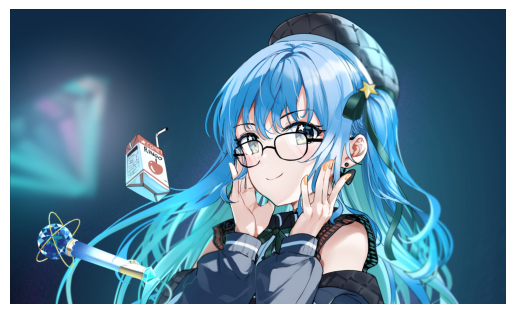

[{'generated_text': 'a woman with a blue wig and a blue and white background '}]
Captioning spider-man.jpg with model2:


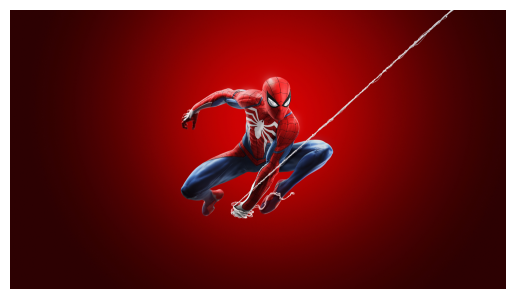

[{'generated_text': 'a spider man in a red suit is jumping'}]
Captioning 48411.jpg with model3:


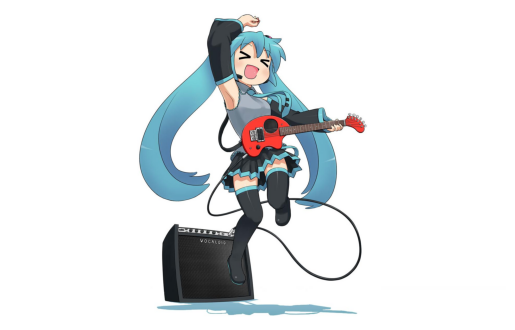

[{'generated_text': 'anime girl with a guitar'}]


In [2]:
import warnings
from transformers import pipeline
from transformers.utils import logging
from PIL import Image
import matplotlib.pyplot as plt
import os

!pip install transformers
!pip install pillow

warnings.filterwarnings(action='ignore')
logging.set_verbosity(40)

models = {
    "model1": "nlpconnect/vit-gpt2-image-captioning",
    "model2": "Salesforce/blip-image-captioning-base",
    "model3": "microsoft/git-base-coco"
}

def caption_image(image_path, model_name):
    try:
        if model_name not in models:
            print(f"Error: Model '{model_name}' not found in the available models.")
            return None

        captioner = pipeline(task="image-to-text", model=models[model_name], device=0 if 'CUDA' in str(next(iter(models.values()))) else -1) # Use GPU if available

        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        caption = captioner(image)
        return caption
    except FileNotFoundError:
        print(f"Error: Image file '{image_path}' not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

image_files = ["1243903.jpg", "spider-man.jpg", "48411.jpg"]

image_models = {
    "1243903.jpg": "model1",
    "spider-man.jpg": "model2",
    "48411.jpg": "model3"
}

for image_file in image_files:
    if os.path.exists(image_file):
        model_name = image_models.get(image_file, "model1")
        print(f"Captioning {image_file} with {model_name}:")
        caption = caption_image(image_file, model_name)
        if caption:
            print(caption)
    else:
        print(f"Error: Image file '{image_file}' not found. Please upload the image to the runtime environment.")